# 2024 COMP90042 Project
*Make sure you change the file name with your group id.*

# Readme
*If there is something to be noted for the marker, please mention here.*

*If you are planning to implement a program with Object Oriented Programming style, please put those the bottom of this ipynb file*

# 1.DataSet Processing
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

1.1 Load the dataset

In [1]:
import json

train_claims = json.load(open("Specifications/data/train-claims.json"))
dev_claims = json.load(open("Specifications/data/dev-claims.json"))
evidences = json.load(open("Specifications/data/evidence.json"))
test_claims = json.load(open("Specifications/data/test-claims-unlabelled.json"))

1.2 Elementary Data Analysis

In [2]:
# For the sack of understanding, just get an idea of the size of the dataset
print(len(test_claims.keys()))
print(len(train_claims.keys()))
print(len(dev_claims.keys()))
print(len(evidences.keys()))

153
1228
154
1208827


In [3]:
# other analysis could be written here if have time

1.3 Data preprocessing

In [4]:
# mostly from workshop
import nltk
import re
from nltk.corpus import stopwords
# nltk.download('wordnet')
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
# nltk.download("stopwords")
stopword = set(stopwords.words('english'))

from nltk.tokenize import word_tokenize

# contraction dict from workshop07
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have",
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not",
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did",
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have",
                    "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have",
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us",
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have",
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not",
                    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have",
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not",
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have",
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have",
                    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will",
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have",
                    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have",
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def lemmatize(word):
    lemma = lemmatizer.lemmatize(word,'v')
    if lemma == word:
        lemma = lemmatizer.lemmatize(word,'n')
    return lemma

# Preprocess with several steps
def pre_process(sent_list):
    output = []
    for sent in sent_list:
        sent = sent.lower() #case-folding
        for word, new_word in contraction_dict.items():
            sent = sent.replace(word, new_word) #dealing with contractions
        # convert all spacing characters to a single space
        sent = re.sub(r'\s', ' ', sent)
        # make sure one white space exists between each words
        sent = re.sub(r' +', ' ', sent)
        sent = re.sub(r'[^\w\s]','',sent) #removing punctuation
        sent_list = word_tokenize(sent) #tokenization
        sent_list = [lemmatize(word) for word in sent_list] # lemmatization
        # sent_list = [x for x in sent_list if len(x) != 1] # single characters are removed as well
        sent_list = [word for word in sent_list if word not in stopword] # stop words removal
        # remove non-english languages
        sent_list = [word for word in sent_list if word.isalnum() or word.isalpha() or word.isnumeric()]
        processed_text = " ".join(sent_list)
        output.append(processed_text)
    return output

In [5]:
# preprocess all the texts
evidence_ids = list(evidences.keys())
evidence_texts = pre_process(list(evidences.values()))
evidence_dict = dict(zip(evidence_ids, evidence_texts))
for i in range(5):
    print(evidence_texts[i])

train_claim_texts = []
train_evidences = []
train_labels = []
train_ids = []
for claim_id, claim_info in train_claims.items():
    train_claim_texts.append(claim_info['claim_text'])
    train_evidences.append([evidence_dict[id] for id in claim_info["evidences"]])
    train_labels.append(claim_info["claim_label"])
    train_ids.append(claim_id)
train_claim_texts = pre_process(train_claim_texts)
for i in range(5):
    print(train_claim_texts[i])

dev_claim_texts = []
dev_evidences = []
dev_labels = []
dev_ids = []
for claim_id, claim_info in dev_claims.items():
    dev_claim_texts.append(claim_info['claim_text'])
    dev_evidences.append([evidence_dict[id] for id in claim_info["evidences"]])
    dev_labels.append(claim_info["claim_label"])
    dev_ids.append(claim_id)
dev_claim_texts = pre_process(dev_claim_texts)
for i in range(5):
    print(dev_claim_texts[i])

test_claim_texts = []
test_ids = []
for claim_id, claim_info in test_claims.items():
    test_claim_texts.append(claim_info["claim_text"])
    test_ids.append(claim_id)
test_claim_texts = pre_process(test_claim_texts)
for i in range(5):
    print(test_claim_texts[i])


john bennet lawes english entrepreneur agricultural scientist
lindberg begin professional career age 16 eventually move new york city 1977
boston lady cambridge vampire weekend
gerald francis goyer bear october 20 1936 professional ice hockey player play 40 game national hockey league
detect abnormality oxytocinergic function schizoaffective mania postpartum psychosis ect modify oxytocin release
scientific evidence co2 pollutant higher co2 concentration actually help ecosystem support plant animal life
el niño drive record high global temperature suggest rise may manmade emission
1946 pdo switch cool phase
weather channel cofounder john coleman provide evidence convincingly refute concept anthropogenic global warm
january 2008 cap 12 month period global temperature drop major well respect indicator
south australia expensive electricity world
3 per cent total annual global emission carbon dioxide human australia produce 13 per cent 3 per cent amount emission reduction effect global clim

TfIDF for similarities

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, max_features=500000)
# vectorizer.fit(train_claim_texts + evidence_texts)
vectorizer.fit(evidence_texts)

train_emb_list = vectorizer.transform(train_claim_texts)
evi_emb_list = vectorizer.transform(evidence_texts)
dev_emb_list = vectorizer.transform(dev_claim_texts)
test_emb_list = vectorizer.transform(test_claim_texts)


In [7]:
print(evi_emb_list.get_shape())
print(train_emb_list.get_shape())

(1208827, 500000)
(1228, 500000)


# 2. Model Implementation
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

In [8]:
import heapq
# retrieve top k similar evidences and for training set, if not all the recorded
# evidences are in top k, put them into the list as well
k = 10
def evidence_candidates(emb_list, claim_ids, claims, train=True):
    candidates = {}
    similarities = cosine_similarity(emb_list, evi_emb_list)
    for i, claim_id in enumerate(claim_ids):
        evidence_sim_dict = {evidence_ids[j]: sim for j, sim in enumerate(similarities[i])}
        # Get top-k evidence IDs using a priority queue
        topk_evidence_sims = heapq.nlargest(k, evidence_sim_dict.items(), key=lambda item: item[1])
        # record top k evidence ids for this claim
        candidates[claim_ids[i]] = [id for id, sim in topk_evidence_sims]
    
    if train:
        for claim_id in claim_ids:
            # all the recorded evidences of a training claim
            for evidence in claims[claim_id]["evidences"]:
                # if the recorded evidence not in top-k
                if evidence not in candidates[claim_id]:
                    # add the evidence into the candidate list
                    candidates[claim_id].append(evidence)
    return candidates

2.1 Convert to classification problem

In [9]:
# if the evidences are recorded in the claim evidences, assign a label 1, otherwise, assign a label 0.
def cls_prepare(evidence_candidates, ids, texts, train=True, dev=False, test=False):
    claim_text = []
    claim_evidence = []
    labels = []
    for claim_id, candidates in evidence_candidates.items():
        # if it's for training set
        if train == True:
            for evidence in candidates:
                # if in the recorded evidences
                if evidence in train_claims[claim_id]["evidences"]:
                    labels.append(1)
                else:
                    labels.append(0)
                num = ids.index(claim_id)
                claim_text.append(texts[num])
                claim_evidence.append(evidence_dict[evidence])
        # for developing set
        elif dev == True:
            for evidence in candidates:
                # if in the recorded evidences
                if evidence in dev_claims[claim_id]["evidences"]:
                    labels.append(1)
                else:
                    labels.append(0)
                num = ids.index(claim_id)
                claim_text.append(texts[num])
                claim_evidence.append(evidence_dict[evidence])
        elif test == True:
            for evidence in candidates:
                num = ids.index(claim_id)
                claim_text.append(texts[num])
                claim_evidence.append(evidence_dict[evidence])
    return claim_text, claim_evidence, labels

In [10]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

2.2 Convet the training set and dev set to the form model requires

In [11]:
train_candidates = evidence_candidates(train_emb_list, train_ids, train_claims, True)
claim_text_train, claim_evidence_train, labels_train = cls_prepare(train_candidates, train_ids, train_claim_texts, train=True, dev=False, test=False)

dev_candidates = evidence_candidates(dev_emb_list, dev_ids, dev_claims, False)
claim_text_dev, claim_evidence_dev, labels_dev = cls_prepare(dev_candidates, dev_ids, dev_claim_texts, train=False, dev=True, test=False)

test_candidates = evidence_candidates(test_emb_list, test_ids, test_claims, False)
claim_text_test, claim_evidence_test, _ = cls_prepare(test_candidates, test_ids, test_claim_texts, train=False, dev=False, test=True)

In [12]:
import collections
print(collections.Counter(np.array(labels_train)))
print(collections.Counter(np.array(labels_dev)))

Counter({0: 11639, 1: 4122})
Counter({0: 1460, 1: 80})


In [13]:
# Create a vocabulary that is used to store the appeared words and give them indices
class Vocab:
    # min_freq as the threshold for throwing away the tokens
    # reserved_tokens as the start or the end tokens of the sentence
    def __init__(self, tokens=None, min_freq=0, reserved_tokens=None):
        if tokens is None:
            tokens = []
        if reserved_tokens is None:
            reserved_tokens = []
        # construct a dictionary for counting the frequency of each token
        counter = count_corpus(tokens)
        # sort the token frequencies
        self.token_freqs = sorted(counter.items(), key=lambda x: x[1],
                                  reverse=True)
        self.unk, uniq_tokens = 0, ['<unk>'] + reserved_tokens
        uniq_tokens += [token for token, freq in self.token_freqs
                        if freq >= min_freq and token not in uniq_tokens]
        self.idx_to_token, self.token_to_idx = [], dict()
        for token in uniq_tokens:
            self.idx_to_token.append(token)
            self.token_to_idx[token] = len(self.idx_to_token) - 1
    
    def __len__(self):
        return len(self.idx_to_token)
    
    # for getting the indices for given tokens
    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]
    
    # for getting the tokens given the indices
    def to_tokens(self, indices):
        if not isinstance(indices, (list, tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[index] for index in indices]

def count_corpus(tokens):
    if len(tokens) == 0 or isinstance(tokens[0], list):
        tokens = [token for line in tokens for token in line]
    return collections.Counter(tokens)
    

In [14]:
def tokenize(claim_data):
    tokens = []
    for data in claim_data:
        tokens.append(word_tokenize(data))
    return tokens

In [15]:
tok_train_claim_text = tokenize(claim_text_train)
tok_train_claim_evidence = tokenize(claim_evidence_train)
tok_dev_claim_text = tokenize(claim_text_dev)
tok_dev_claim_evidence = tokenize(claim_evidence_dev)
tok_test_claim_text = tokenize(claim_text_test)
tok_test_claim_evidence = tokenize(claim_evidence_test)

In [16]:
vocab1 = Vocab(tok_train_claim_text + tok_train_claim_evidence)
print(list(vocab1.token_to_idx.items())[:10])

[('<unk>', 0), ('warm', 1), ('climate', 2), ('global', 3), ('temperature', 4), ('change', 5), ('ice', 6), ('year', 7), ('increase', 8), ('co2', 9)]


In [17]:
print(vocab1.__len__())

11654


In [18]:
train_seqs1 = vocab1[tok_train_claim_text]
train_seqs2 = vocab1[tok_train_claim_evidence]
dev_seqs1 = vocab1[tok_dev_claim_text]
dev_seqs2 = vocab1[tok_dev_claim_evidence]
test_seqs1 = vocab1[tok_test_claim_text]
test_seqs2 = vocab1[tok_test_claim_evidence]

In [19]:
train_seqs1 = keras.preprocessing.sequence.pad_sequences(train_seqs1, padding="post")
train_seqs2 = keras.preprocessing.sequence.pad_sequences(train_seqs2, padding="post")
dev_seqs1 = keras.preprocessing.sequence.pad_sequences(dev_seqs1, padding="post")
dev_seqs2 = keras.preprocessing.sequence.pad_sequences(dev_seqs2, padding="post")
test_seqs1 = keras.preprocessing.sequence.pad_sequences(test_seqs1, padding="post")
test_seqs2 = keras.preprocessing.sequence.pad_sequences(test_seqs2, padding="post")

2.3 Build the model

In [20]:
vocab_size = vocab1.__len__() + 1
output_dim = 200

In [21]:
seq_model1 = keras.Sequential([
    keras.layers.Embedding(input_dim=vocab_size, output_dim=output_dim),
    keras.layers.Dropout(0.1),
    keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences=True, dropout=0.1)),
    keras.layers.Bidirectional(keras.layers.LSTM(100, dropout=0.1)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.1),
])

# This is for Tfidf vectorizer, no further embeddings needed
input_tfidf1 = keras.layers.Input(shape=(None, ))
input_tfidf2 = keras.layers.Input(shape=(None, ))
output1 = seq_model1(input_tfidf1)
output2 = seq_model1(input_tfidf2)
sim = keras.layers.Dot(axes=1, normalize=True)([output1, output2])
label1_prob = keras.activations.sigmoid(sim)
model1 = keras.Model(inputs=[input_tfidf1, input_tfidf2], outputs=label1_prob)

model1.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
model1.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 100)       │  2,832,700 │ input_layer[0][0… │
│ (Sequential)        │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 1)         │          0 │ sequential[0][0], │
│                     │                   │            │ sequential[1][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sigmoid (Sigmoid)   │ (None, 1)         │          0 │ dot[0][0]         │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,832,700 (10.81 MB)

 Trainable params: 2,832,700 (10.81 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
seq_model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, None, 200)      │     2,331,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, None, 200)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, None, 200)      │       240,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 200)            │       240,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,832,700 (10.81 MB)

 Trainable params: 2,832,700 (10.81 MB)

 Non-trainable params: 0 (0.00 B)

2.4 Train the model

In [23]:
history = model1.fit([train_seqs1, train_seqs2], 
          np.array(labels_train), epochs=5, 
          validation_data=([dev_seqs1, dev_seqs2], 
                           np.array(labels_dev)), batch_size=500, class_weight={0: 1, 1: 3})
dev_loss, dev_acc = model1.evaluate([dev_seqs1, dev_seqs2], np.array(labels_dev))
print('Dev Loss:', dev_loss)
print('Dev Accuracy:', dev_acc)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.2619 - loss: 1.0731 - val_accuracy: 0.3130 - val_loss: 0.9456
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.3085 - loss: 1.0359 - val_accuracy: 0.7312 - val_loss: 0.7996
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.4130 - loss: 1.0315 - val_accuracy: 0.6526 - val_loss: 0.8492
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.4473 - loss: 1.0249 - val_accuracy: 0.5805 - val_loss: 0.8904
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.4483 - loss: 1.0261 - val_accuracy: 0.6390 - val_loss: 0.8429
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6468 - loss: 0.8421
Dev Loss: 0.8429452180862427
Dev Accuracy: 0.6389610171318054


(0.0, 1.072219568490982)

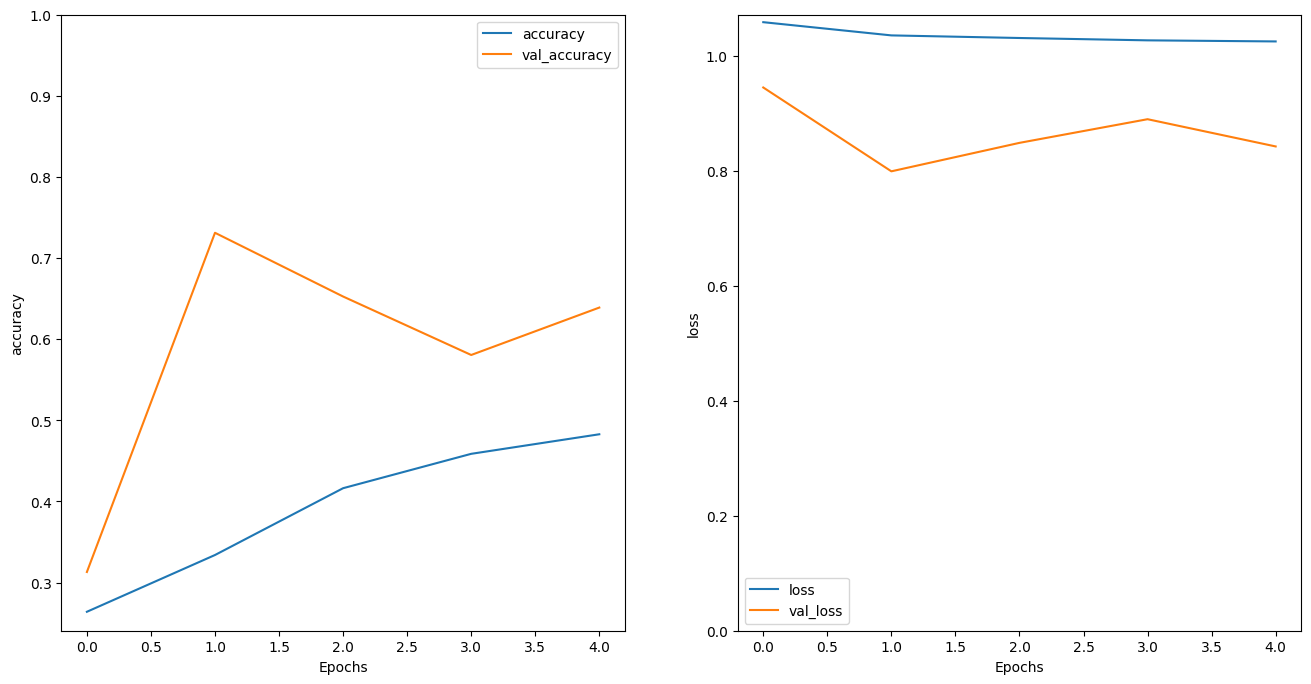

In [24]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

2.5 Evidence Retrieval 

In [25]:
# Task 1
top_k_evidence = 1

# e.g. evidence_retrival(dev_seqs1, dev_seqs2, 1000, dev_claims, dev_evidences)
def evidence_retrival(input_seqs1, input_seqs2, batch_size, claims, claim_candidates):
    test_claim_dict = {}
    predictions = model1.predict([input_seqs1, input_seqs2], batch_size=batch_size)
    for claim_id, claim_info in claims.items():
        top_k_predictions = sorted(enumerate(predictions[:k]), key=lambda x: x[1], reverse=True)[:top_k_evidence]
        top_k_evidence_num = [(index, value) for index, value in top_k_predictions]
        test_claim_dict[claim_id] = []
        for i in range(top_k_evidence):
            evidence_id = claim_candidates[claim_id][top_k_evidence_num[i][0]]
            prediction = top_k_evidence_num[i][1]
            evidence = evidences[evidence_id]
            test_claim_dict[claim_id].append((claim_info["claim_text"], evidence_id, evidence, prediction))
        predictions = predictions[k:]
    return test_claim_dict


In [26]:
dev_claim_dict = evidence_retrival(dev_seqs1, dev_seqs2, 50, dev_claims, dev_candidates)
test_claim_dict = evidence_retrival(test_seqs1, test_seqs2, 50, test_claims, test_candidates)
test_claim_dict

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step


{'claim-2967': [('The contribution of waste heat to the global climate is 0.028 W/m2.',
   'evidence-308923',
   'Global forcing from waste heat was 0.028 W/m2 in 2005.',
   array([0.5], dtype=float32))],
 'claim-979': [('“Warm weather worsened the most recent five-year drought, which included the driest four-year period on record in terms of statewide precipitation.',
   'evidence-957389',
   'Between 2011 and 2014, California experienced the driest period in its recorded history and more than 100 million trees died in the drought, creating areas of dead, dry wood.',
   array([0.722166], dtype=float32))],
 'claim-1609': [('Greenland has only lost a tiny fraction of its ice mass.',
   'evidence-1200633',
   'Land ice sheets in both Antarctica and Greenland have been losing mass since 2002 and have seen an acceleration of ice mass loss since 2009.',
   array([0.5], dtype=float32))],
 'claim-1020': [('“The global reef crisis does not necessarily mean extinction for coral species.',
   'e

In [27]:
train_claim_dict = evidence_retrival(train_seqs1, train_seqs2, 50, train_claims, train_candidates)

316/316 ━━━━━━━━━━━━━━━━━━━━ 52s 165ms/step


In [28]:
# Add evidences predicted from computing the similarity directly without putting into the model
topk_sim = 4
dev_evidences_predict = [[t[1] for t in value] for key, value in dev_claim_dict.items()]
for id, v in dev_candidates.items():
    i = dev_ids.index(id)
    dev_evidences_predict[i].extend([evidence for evidence in v[:topk_sim] if evidence not in dev_evidences_predict[i]])

test_evidences_predict = [[t[1] for t in value] for key, value in test_claim_dict.items()]
for id, v in test_candidates.items():
    i = test_ids.index(id)
    test_evidences_predict[i].extend([evidence for evidence in v[:topk_sim] if evidence not in test_evidences_predict[i]])
print(test_evidences_predict)

[['evidence-308923', 'evidence-22107', 'evidence-213569', 'evidence-257116'], ['evidence-957389', 'evidence-178433', 'evidence-1077548', 'evidence-200293'], ['evidence-1200633', 'evidence-962481', 'evidence-776422', 'evidence-399454'], ['evidence-642301', 'evidence-161852', 'evidence-205895', 'evidence-670186'], ['evidence-834109', 'evidence-253763', 'evidence-851510', 'evidence-432221'], ['evidence-72690', 'evidence-506409', 'evidence-292357', 'evidence-695091'], ['evidence-828180', 'evidence-670186', 'evidence-323266', 'evidence-1183711', 'evidence-688029'], ['evidence-961837', 'evidence-1104813', 'evidence-822729', 'evidence-890095', 'evidence-213946'], ['evidence-51798', 'evidence-417371', 'evidence-403673', 'evidence-311208', 'evidence-57888'], ['evidence-1091739', 'evidence-37274', 'evidence-369911', 'evidence-1044935', 'evidence-448411'], ['evidence-12425', 'evidence-668884', 'evidence-578065', 'evidence-307967'], ['evidence-572332', 'evidence-661699', 'evidence-173055', 'eviden

In [29]:
train_evidences_predict = [[t[1] for t in value] for key, value in train_claim_dict.items()]
for id, v in train_candidates.items():
    i = train_ids.index(id)
    train_evidences_predict[i].extend([evidence for evidence in v[:topk_sim] if evidence not in train_evidences_predict[i]])

In [30]:
max_num_evi = max([len(predicts) for predicts in dev_evidences_predict])
max_num_evi

5

2.6 Claim classification

In [31]:
# e.g. cls_transform(train_claim_texts, train_labels, train_evidences)
def cls_transform(claim_texts, labels, set_evidences, test=False):
    x = []
    y = []
    class_labels = {"SUPPORTS": 0, "REFUTES": 1, "NOT_ENOUGH_INFO": 2, "DISPUTED": 3}
    dataset = []
    for text in claim_texts:
        dataset_dict = {}
        index = claim_texts.index(text)
        if test == False:
            dataset_dict["label"] = class_labels[labels[index]]
        dataset_dict["text"] = "<sep>".join([text] + set_evidences[index])
        dataset.append(dataset_dict)
    for data in dataset:
        x.append(data["text"])
        if test == False:
            y.append(data["label"])
    return x, y

In [32]:
train_x, train_y = cls_transform(train_claim_texts, train_labels, train_evidences, test=False)
dev_x, dev_y = cls_transform(dev_claim_texts, dev_labels, dev_evidences_predict, test=False)
test_x, _ = cls_transform(test_claim_texts, [], test_evidences_predict, test=True)

In [33]:
print(collections.Counter(train_y))
print(collections.Counter(dev_y))

Counter({0: 518, 2: 388, 1: 198, 3: 124})
Counter({0: 68, 2: 41, 1: 27, 3: 18})


In [34]:
tok_train_x = tokenize(train_x)
tok_dev_x = tokenize(dev_x)
tok_test_x = tokenize(test_x)
vocab2 = Vocab(tok_train_x)
print(list(vocab2.token_to_idx.items())[:10])
print(vocab2.__len__())

[('<unk>', 0), ('sep', 1), ('<', 2), ('>', 3), ('warm', 4), ('temperature', 5), ('climate', 6), ('global', 7), ('change', 8), ('increase', 9)]
8153


In [35]:
train_indlist = vocab2[tok_train_x]
dev_indlist = vocab2[tok_dev_x]
test_indlist = vocab2[tok_test_x]

In [36]:
train_indlist = keras.preprocessing.sequence.pad_sequences(train_indlist, padding="post")
dev_indlist = keras.preprocessing.sequence.pad_sequences(dev_indlist, padding="post")
test_indlist = keras.preprocessing.sequence.pad_sequences(test_indlist, padding="post")

In [37]:
seq_model2 = keras.Sequential([
    keras.layers.Embedding(input_dim=vocab2.__len__() + 1, output_dim=output_dim),
    keras.layers.Dropout(0.1),
    keras.layers.Bidirectional(keras.layers.LSTM(100, return_sequences=True, dropout=0.1)),
    keras.layers.Bidirectional(keras.layers.LSTM(100, dropout=0.1)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(4, activation='softmax')
])

seq_model2.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [38]:
seq_model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
history = seq_model2.fit(train_indlist, np.array(train_y), epochs=5, 
          validation_data=(dev_indlist, np.array(dev_y)))
dev_loss, dev_acc = seq_model2.evaluate(dev_indlist, np.array(dev_y))
print('Dev Loss:', dev_loss)
print('Dev Accuracy:', dev_acc)

Epoch 1/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 22s 521ms/step - accuracy: 0.3692 - loss: 1.3571 - val_accuracy: 0.4416 - val_loss: 1.2755
Epoch 2/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 508ms/step - accuracy: 0.4145 - loss: 1.2628 - val_accuracy: 0.4416 - val_loss: 1.2756
Epoch 3/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 22s 578ms/step - accuracy: 0.4260 - loss: 1.2659 - val_accuracy: 0.4416 - val_loss: 1.2785
Epoch 4/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 26s 653ms/step - accuracy: 0.4486 - loss: 1.2057 - val_accuracy: 0.4351 - val_loss: 1.5325
Epoch 5/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 25s 641ms/step - accuracy: 0.6478 - loss: 0.9279 - val_accuracy: 0.4351 - val_loss: 1.7576
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4805 - loss: 1.6933
Dev Loss: 1.7575798034667969
Dev Accuracy: 0.4350649416446686


In [40]:
cls_predictions_dev = seq_model2.predict(dev_indlist)
cls_predictions_test = seq_model2.predict(test_indlist)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [41]:
cls_predictions_dev = cls_predictions_dev.tolist()
cls_predictions_test = cls_predictions_test.tolist()

In [42]:
# class_labels = {"SUPPORTS": 0, "REFUTES": 1, "NOT_ENOUGH_INFO": 2, "DISPUTED": 3}
final_dict_dev = {}
for prediction in cls_predictions_dev:
    order = cls_predictions_dev.index(prediction)
    max_value, max_index = max((value, index) for index, value in enumerate(prediction))
    if max_index == 0:
        final_dict_dev[dev_ids[order]] = {"claim_text": dev_claims[dev_ids[order]]["claim_text"], "claim_label": "SUPPORTS", "evidences": dev_evidences_predict[order]}
    elif max_index == 1:
        final_dict_dev[dev_ids[order]] = {"claim_text": dev_claims[dev_ids[order]]["claim_text"], "claim_label": "REFUTES", "evidences": dev_evidences_predict[order]}
    elif max_index == 2:
        final_dict_dev[dev_ids[order]] = {"claim_text": dev_claims[dev_ids[order]]["claim_text"], "claim_label": "NOT_ENOUGH_INFO", "evidences": dev_evidences_predict[order]}
    elif max_index == 3:
        final_dict_dev[dev_ids[order]] = {"claim_text": dev_claims[dev_ids[order]]["claim_text"], "claim_label": "DISPUTED", "evidences": dev_evidences_predict[order]}
final_dict_dev

{'claim-752': {'claim_text': '[South Australia] has the most expensive electricity in the world.',
  'claim_label': 'SUPPORTS',
  'evidences': ['evidence-421845',
   'evidence-684667',
   'evidence-554677',
   'evidence-240255']},
 'claim-375': {'claim_text': 'when 3 per cent of total annual global emissions of carbon dioxide are from humans and Australia prod\xaduces 1.3 per cent of this 3 per cent, then no amount of emissions reductio\xadn here will have any effect on global climate.',
  'claim_label': 'SUPPORTS',
  'evidences': ['evidence-402802',
   'evidence-1140012',
   'evidence-78654',
   'evidence-839069']},
 'claim-1266': {'claim_text': 'This means that the world is now 1C warmer than it was in pre-industrial times',
  'claim_label': 'SUPPORTS',
  'evidences': ['evidence-694262',
   'evidence-937622',
   'evidence-100779',
   'evidence-38305']},
 'claim-871': {'claim_text': '“As it happens, Zika may also be a good model of the second worrying effect — disease mutation.',
  'c

In [43]:
final_dict_test = {}
for prediction in cls_predictions_test:
    order = cls_predictions_test.index(prediction)
    max_value, max_index = max((value, index) for index, value in enumerate(prediction))
    if max_index == 0:
        final_dict_test[test_ids[order]] = {"claim_text": test_claims[test_ids[order]]["claim_text"], "claim_label": "SUPPORTS", "evidences": test_evidences_predict[order]}
    elif max_index == 1:
        final_dict_test[test_ids[order]] = {"claim_text": test_claims[test_ids[order]]["claim_text"], "claim_label": "REFUTES", "evidences": test_evidences_predict[order]}
    elif max_index == 2:
        final_dict_test[test_ids[order]] = {"claim_text": test_claims[test_ids[order]]["claim_text"], "claim_label": "NOT_ENOUGH_INFO", "evidences": test_evidences_predict[order]}
    elif max_index == 3:
        final_dict_test[test_ids[order]] = {"claim_text": test_claims[test_ids[order]]["claim_text"], "claim_label": "DISPUTED", "evidences": test_evidences_predict[order]}
final_dict_test

{'claim-2967': {'claim_text': 'The contribution of waste heat to the global climate is 0.028 W/m2.',
  'claim_label': 'SUPPORTS',
  'evidences': ['evidence-308923',
   'evidence-22107',
   'evidence-213569',
   'evidence-257116']},
 'claim-979': {'claim_text': '“Warm weather worsened the most recent five-year drought, which included the driest four-year period on record in terms of statewide precipitation.',
  'claim_label': 'SUPPORTS',
  'evidences': ['evidence-957389',
   'evidence-178433',
   'evidence-1077548',
   'evidence-200293']},
 'claim-1609': {'claim_text': 'Greenland has only lost a tiny fraction of its ice mass.',
  'claim_label': 'SUPPORTS',
  'evidences': ['evidence-1200633',
   'evidence-962481',
   'evidence-776422',
   'evidence-399454']},
 'claim-1020': {'claim_text': '“The global reef crisis does not necessarily mean extinction for coral species.',
  'claim_label': 'SUPPORTS',
  'evidences': ['evidence-642301',
   'evidence-161852',
   'evidence-205895',
   'evidenc

# 3.Testing and Evaluation
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

In [44]:
file_path_dev = "Specifications/data/dev-predict.json"

# Write the dictionary to a JSON file
with open(file_path_dev, 'w') as json_file1:
    json.dump(final_dict_dev, json_file1)

file_path_test = "Specifications/data/test-output.json"

# Write the dictionary to a JSON file
with open(file_path_test, 'w') as json_file2:
    json.dump(final_dict_test, json_file2)

In [45]:
import subprocess

output = subprocess.check_output("python3 Specifications/eval.py --predictions Specifications/data/dev-predict.json --groundtruth Specifications/data/dev-claims.json", shell=True)

print(output)

b'Evidence Retrieval F-score (F)    = 0.08847660276231706\nClaim Classification Accuracy (A) = 0.43506493506493504\nHarmonic Mean of F and A          = 0.1470487617670356\n'


## Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed*